In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, lambdify, exp, diff

### 定义函数

In [2]:
x, y = symbols('x, y')
f = exp(-x ** 2)
f_fun = lambdify(x, f)

x_array = np.linspace(-3, 3, 100)
f_array = f_fun(x_array)

df_dx = diff(f, x)
df_dx_fun = lambdify(x, df_dx)
df_dx_array = df_dx_fun(x_array)

### 一元函数图像

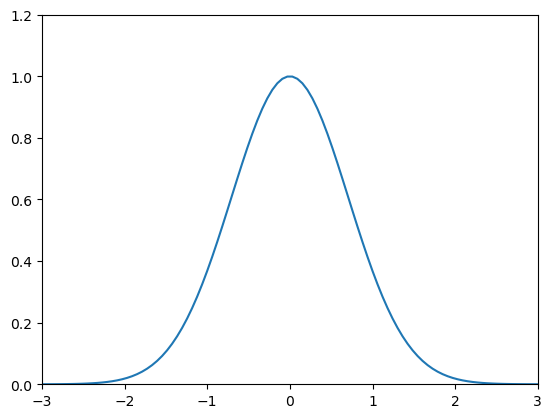

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_array, f_array)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1.2)
# fig.savefig('Figures/默认大小.svg', format='svg')
plt.show()

### 图片大小

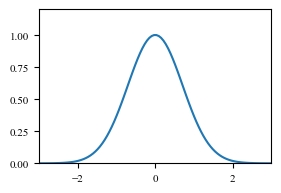

In [4]:
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
ax.plot(x_array, f_array)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1.2)
plt.xticks(fontname='Times New Roman', fontsize=8)
plt.yticks(fontname='Times New Roman', fontsize=8)
plt.show()

### 调整边距

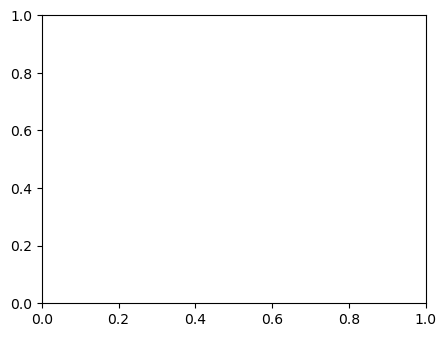

In [5]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.8)
plt.show()

### 轴对象位置、大小

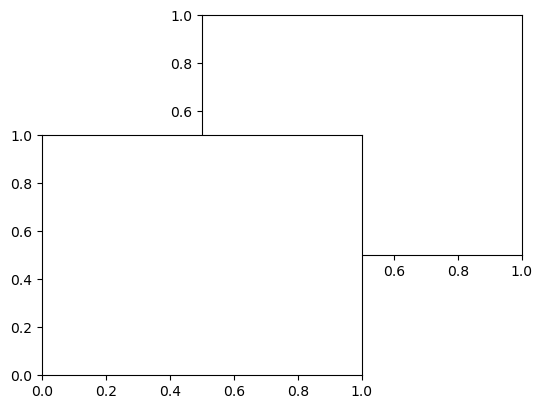

In [6]:
fig = plt.figure()
ax1 = fig.add_axes([0.5, 0.5, 0.5, 0.5])
ax2 = fig.add_axes([0.25, 0.25, 0.5, 0.5])

### 2行1列

(-1.0, 1.0)

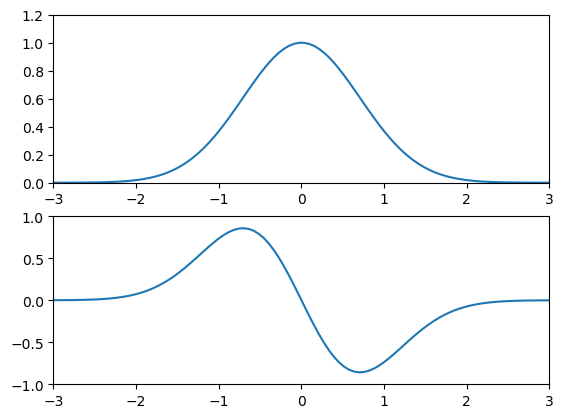

In [7]:
fig = plt.figure()
ax_1 = fig.add_subplot(211)
ax_1.plot(x_array, f_array)
ax_1.set_xlim(-3, 3)
ax_1.set_ylim(0, 1.2)

ax_2 = fig.add_subplot(212)
ax_2.plot(x_array, df_dx_array)
ax_2.set_xlim(-3, 3)
ax_2.set_ylim(-1, 1)

(-1.0, 1.0)

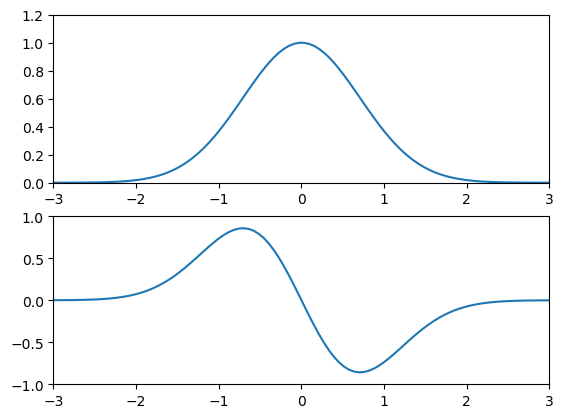

In [8]:
fig = plt.figure()

ax1 = fig.add_axes([0.125, 0.11 + 0.42, .775, .35])
ax1.plot(x_array, f_array)
ax1.set_xlim(-3, 3)
ax1.set_ylim(0, 1.2)

ax2 = fig.add_axes([0.125, 0.11, .775, .35])
ax2.plot(x_array, df_dx_array)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-1, 1)

### 1行2列

(-1.0, 1.0)

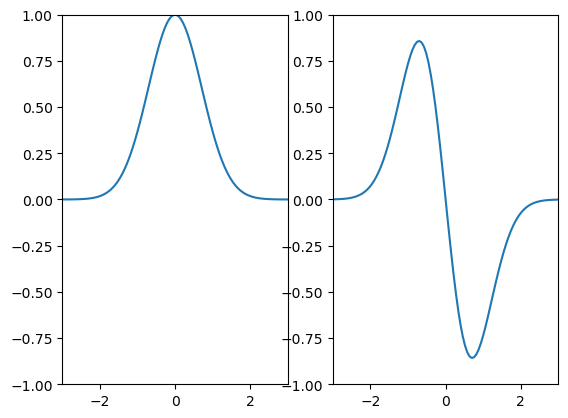

In [9]:
fig = plt.figure()
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(x_array, f_array)
ax_1.set_xlim(-3, 3)
ax_1.set_ylim(-1, 1)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(x_array, df_dx_array)
ax_2.set_xlim(-3, 3)
ax_2.set_ylim(-1, 1)

### 二元函数

In [10]:
f_xy = 3 * (1 - x) ** 2 * exp(-(x ** 2) - (y + 1) ** 2) \
       - 10 * (x / 5 - x ** 3 - y ** 5) * exp(-x ** 2 - y ** 2) \
       - 1 / 3 * exp(-(x + 1) ** 2 - y ** 2)

f_xy_fcn = lambdify([x, y], f_xy)

In [11]:
## 自定义mesh函数
def mesh(num=101):
    # number of mesh grids
    x_array = np.linspace(-3, 3, num)
    y_array = np.linspace(-3, 3, num)
    xx, yy = np.meshgrid(x_array, y_array)

    return xx, yy

### 填充等高线

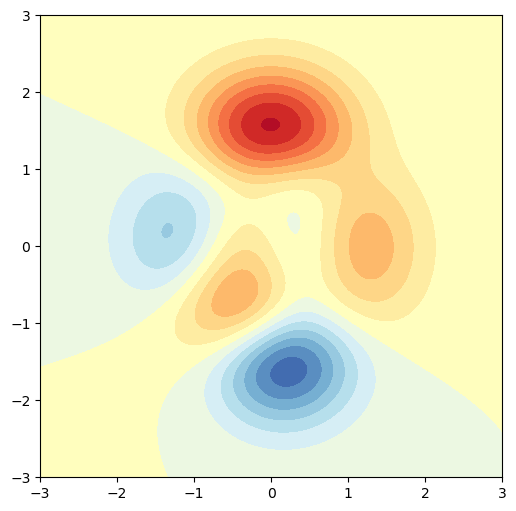

In [12]:
xx, yy = mesh(num=601)
ff = f_xy_fcn(xx, yy)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(xx, yy, ff,
            levels=np.linspace(-8, 9, 18),
            cmap='RdYlBu_r')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

### 图中图

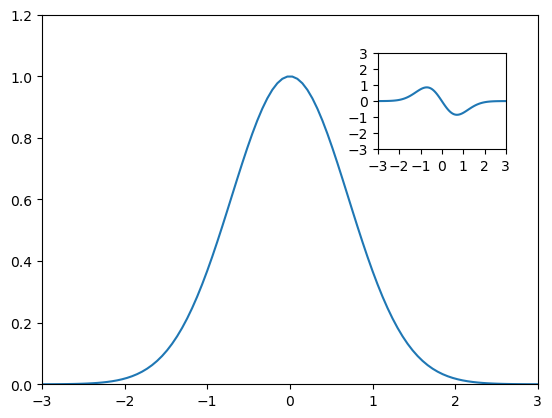

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_array, f_array)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1.2)

ax_zoom = fig.add_axes([0.65, 0.6, 0.2, 0.2])
ax_zoom.plot(x_array, df_dx_array)
ax_zoom.set_xlim(-3, 3)
ax_zoom.set_ylim(-1, 1)
ax_zoom.set_xticks(np.arange(-3, 4))
ax_zoom.set_yticks(np.arange(-3, 4))  # 设置坐标
plt.show()

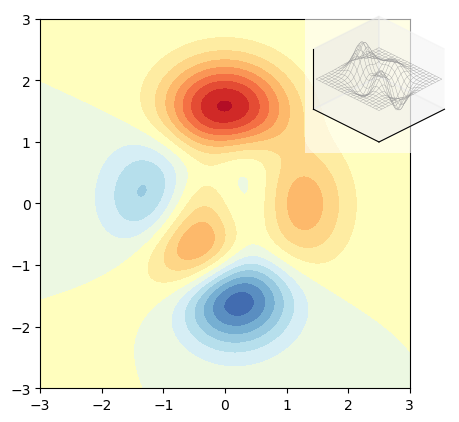

In [14]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, ff,
            levels=np.linspace(-8, 9, 18),
            cmap='RdYlBu_r')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

ax_zoom = fig.add_axes([0.6, 0.6, 0.3, 0.3], projection='3d')
ax_zoom.plot_wireframe(xx, yy, ff,
                       color=[0.6, 0.6, 0.6],
                       rstride=30, cstride=30,
                       linewidth=0.25)

ax_zoom.set_proj_type('ortho')
ax_zoom.set_xlim(xx.min(), xx.max())
ax_zoom.set_ylim(yy.min(), yy.max())
ax_zoom.set_zlim(-8, 8)
ax_zoom.patch.set_alpha(0.6)
ax_zoom.view_init(azim=-135, elev=30)
ax_zoom.grid(False)
ax_zoom.set_xticks([])
ax_zoom.set_yticks([])
ax_zoom.set_zticks([])
plt.show()

### 混合二维、三维可视化方案

C:\Users\ghdong\AppData\Local\Temp\ipykernel_21824\4014966690.py:7: UserWarning: linewidths is ignored by contourf
  ax.contourf(xx, yy, ff,


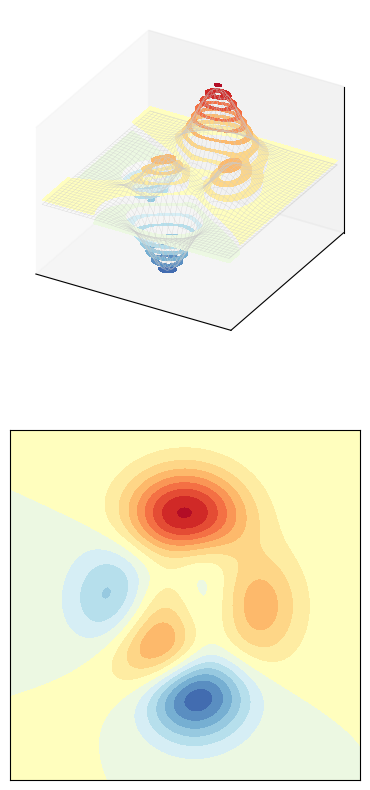

In [15]:
fig = plt.figure(figsize=(5, 10))

ax = fig.add_subplot(211, projection='3d')

ax.plot_wireframe(xx, yy, ff, color='0.8', lw=0.2)

ax.contourf(xx, yy, ff,
            levels=np.linspace(-8, 9, 18),
            cmap='RdYlBu_r', linewidths=1)

ax.set_proj_type('ortho')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

ax = fig.add_subplot(212)

ax.contourf(xx, yy, ff,
            levels=np.linspace(-8, 9, 18),
            cmap='RdYlBu_r')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')

### 坐标轴

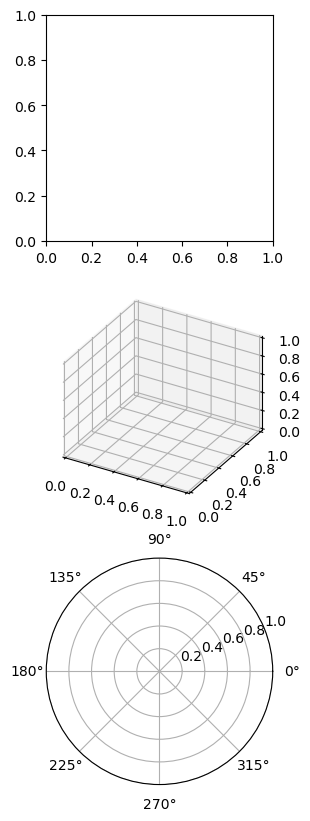

In [16]:
fig = plt.figure(figsize=(5, 10))
ax_2D = fig.add_subplot(3, 1, 1, aspect=1)

ax_3D = fig.add_subplot(3, 1, 2, projection='3d')
ax_3D.set_proj_type('ortho')

ax_polar = fig.add_subplot(3, 1, 3, projection='polar')

### 使用shubplots绘制一元高斯分布概率密度函数曲线

In [17]:
x_array = np.linspace(-5, 5, 200)
mu_array = [-2, -1, 0, 1, 2]
sigma_array = [0.5, 0.75, 1, 1.5, 2]
mu_array_, sigma_array_ = np.meshgrid(mu_array, sigma_array)

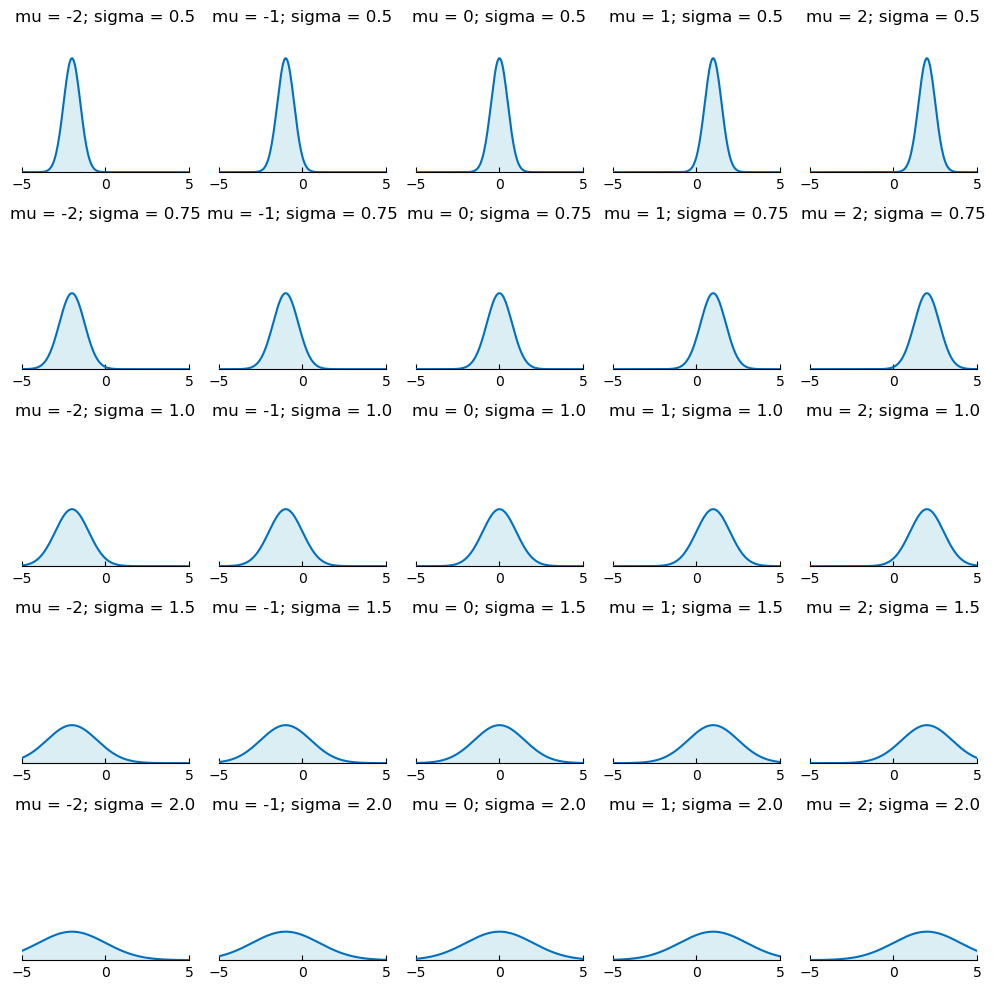

In [18]:
# PDF of Beta Distributions
from scipy.stats import norm

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for mu_idx, sigma_idx, ax in zip(mu_array_.ravel(), sigma_array_.ravel(), axs.ravel()):
    title_idx = 'mu = ' + str(mu_idx) + '; sigma = ' + str(sigma_idx)
    ax.plot(x_array, norm.pdf(x_array, mu_idx, sigma_idx), color='#0070C0')

    # 填充两条水平曲线之间的区域  y1 = norm.pdf, y2 = 0
    ax.fill_between(x_array, norm.pdf(x_array, mu_idx, sigma_idx), 0, color='#DBEEF3')

    ax.grid(False)

    ax.set_yticklabels([])  # 将任何其他类型的值作为标签，可以赋值给之前已经设置过的set_xtick
    ax.set_yticks([])
    ax.get_yaxis().set_visible(False)
    ax.set(ylabel=None)

    ax.set_title(title_idx)
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1)
    ax.set_xticks([-5, 0, 5])
    ax.spines['left'].set_color('none')

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis="x", direction='in')

plt.tight_layout()

### 使用subplots绘制Beta分布概率密度函数曲线

In [19]:
x_array = np.linspace(0, 1, 200)
alpha_array = [0.5, 1, 2, 4, 8]
beta_array = [0.5, 1, 2, 4, 8]
alpha_array_, beta_array_ = np.meshgrid(alpha_array, beta_array)

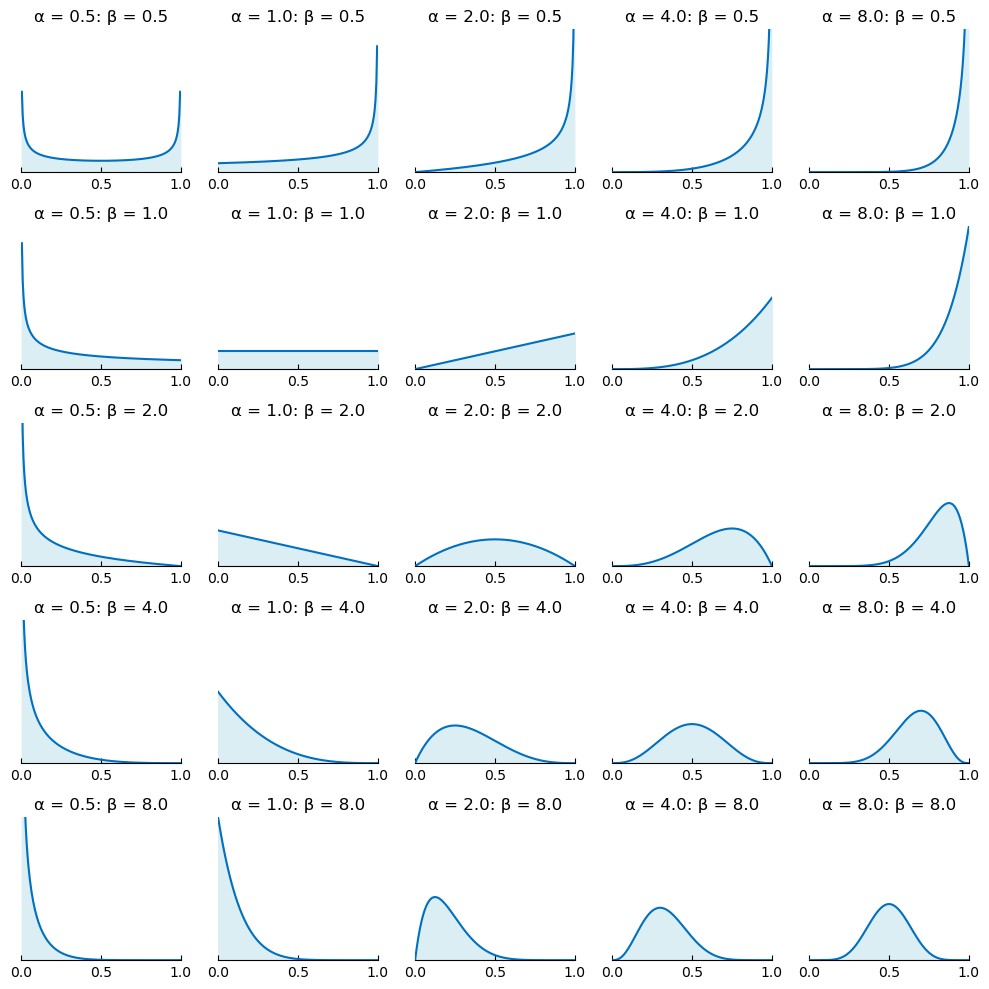

In [20]:
# PDF of Beta Distrubutions
from scipy.stats import beta

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for alpha_idx, beta_idx, ax in zip(alpha_array_.ravel(), beta_array_.ravel(), axs.ravel()):
    title_idx = '\u03B1 = ' + str(alpha_idx) + ': \u03B2 = ' + str(beta_idx)
    ax.plot(x_array, beta.pdf(x_array, alpha_idx, beta_idx), color='#0070C0')

    ax.fill_between(x_array, beta.pdf(x_array, alpha_idx, beta_idx), 0, color='#DBEEF3')

    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.get_yaxis().set_visible(False)
    ax.set(ylabel=None)

    ax.set_title(title_idx)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 8)
    ax.set_xticks([0, 0.5, 1])
    ax.spines['left'].set_color('none')

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis="x", direction='in')

plt.tight_layout()

### 使用GridSpec绘制满足二元高斯分布的随机数散点图和边缘分布直方图

In [21]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

[]

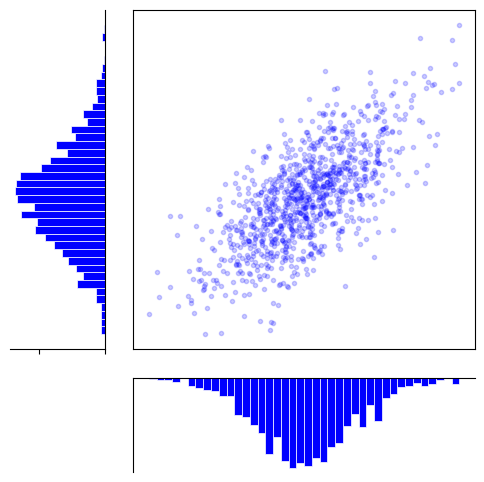

In [22]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.3)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[])
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[])

# scatter points on the main axes
main_ax.plot(x, y, 'ob', markersize=3, alpha=0.2)
main_ax.set_xticks([])
main_ax.set_yticks([])

# histogram on the attached axes
x_hist.hist(x, 40,
            orientation='vertical', color='b',
            edgecolor='white', lw=0.5)
x_hist.spines[['right', 'bottom']].set_visible(False)  # 隐藏图脊
x_hist.invert_yaxis()
x_hist.set_xticks([])
x_hist.set_yticks([])

y_hist.hist(y, 40,
            orientation='horizontal', color='b',
            edgecolor='white', lw=0.5)
y_hist.spines[['left', 'top']].set_visible(False)
y_hist.invert_xaxis()
y_hist.set_yticks([])
y_hist.set_yticks([])

[]

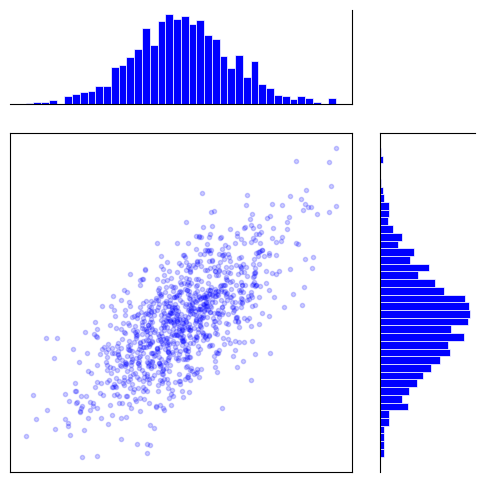

In [23]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.3)
main_ax = fig.add_subplot(grid[1:, :-1])
x_hist = fig.add_subplot(grid[0, :-1])
y_hist = fig.add_subplot(grid[1:, -1])

# scatter points on the main axes
main_ax.plot(x, y, 'ob', markersize=3, alpha=0.2)
main_ax.set_xticks([])
main_ax.set_yticks([])

# histogram on the attached axes
x_hist.hist(x, 40,
            orientation='vertical', color='b',
            edgecolor='white', lw=0.5)
x_hist.spines[['top', 'left']].set_visible(False)
x_hist.set_xticks([])
x_hist.set_yticks([])

y_hist.hist(y, 40,
            orientation='horizontal', color='b',
            edgecolor='white', lw=0.5)
y_hist.spines[['bottom', 'right']].set_visible(False)
y_hist.set_xticks([])
y_hist.set_yticks([])

### 使用GridSpec绘制的Dirichlet分布和边缘Beta分布

In [24]:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_iris
import scipy.stats as st
import scipy.stats as stats
import matplotlib.gridspec as gridspec

In [25]:
def plot_joint_marginal(xx1, xx2, surface,
                        x1, f_x1,
                        x2, f_x2,
                        title_txt, color='#0070C0'):
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[3, 1],
                           height_ratios=[3, 1])

    ax1 = plt.subplot(gs[0])

    # Plot bivariate normal
    ax1.contour(xx1, xx2, surface, 20, cmap='RdYlBu_r')

    ax1.yaxis.set_label_position('right')  # 设置y轴标签位置
    ax1.set_xticks(np.arange(0, 1.2, 0.2))
    ax1.set_yticks(np.arange(0, 1.2, 0.2))
    ax1.set_title(title_txt)

    # Plot Y marginal
    ax2 = plt.subplot(gs[1])

    ax2.plot(f_x2, x2, color=color)

    ax2.fill_between(f_x2, x2,
                     edgecolor='none',
                     facecolor=color,
                     alpha=0.2)

    ax2.set_xlabel('PDF')
    ax2.set_ylim(0, 1)
    ax2.set_xlim(0, 5)
    ax2.set_xticks(np.arange(6))
    ax2.set_yticks(np.arange(0, 1.2, 0.2))
    ax2.invert_xaxis()
    ax2.yaxis.tick_right()  # 将 y 轴是数值显示在右边

    # Plot X marginal
    ax3 = plt.subplot(gs[2])

    ax3.plot(x1, f_x1, color=color)

    ax3.fill_between(x1, f_x1,
                     edgecolor='none',
                     facecolor=color,
                     alpha=0.2)

    ax3.set_ylabel('PDF')
    ax3.yaxis.set_label_position('left')
    ax3.set_xlim(0, 1)
    ax3.set_xticks(np.arange(0, 1.2, 0.2))
    ax3.set_ylim(0, 5)
    ax3.set_yticks(np.arange(6))

    ax4 = plt.subplot(gs[3])
    ax4.set_visible(False)

    plt.show()

In [26]:
x1 = np.linspace(0, 1, 201)
x2 = np.linspace(0, 1, 201)

xx1, xx2 = np.meshgrid(x1, x2)

xx3 = 1.0 - xx1 - xx2
xx3 = np.where(xx3 > 0.0, xx3, np.nan)

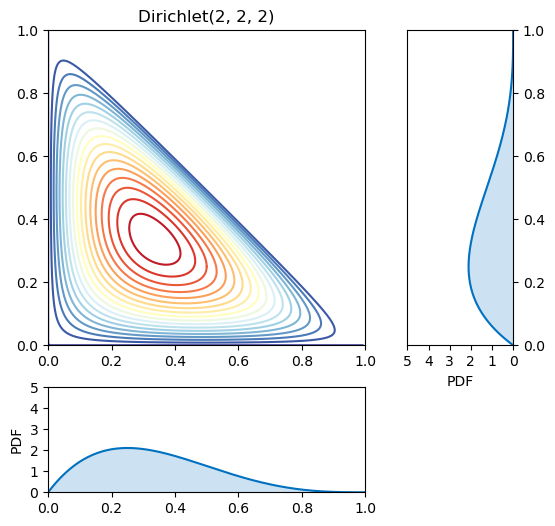

In [27]:
# Dirichlet alphas
alpha_1 = 2
alpha_2 = 2
alpha_3 = 2

alpha_0 = alpha_1 + alpha_2 + alpha_3

alphas = np.array([alpha_1, alpha_2, alpha_3])
rv = stats.dirichlet(alphas)
# 1-2
PDF_ff = rv.pdf(np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])))  # 估计概率函数密度

PDF_ff = np.reshape(PDF_ff, xx1.shape)

beta_dist = stats.beta

theta_array = np.linspace(0, 1, 500)

beta_1 = alpha_0 - alpha_1
f_x1 = beta_dist.pdf(
    x1,
    alpha_1,
    beta_1)

beta_2 = alpha_0 - alpha_2
f_x2 = beta_dist.pdf(
    x2,
    alpha_2,
    beta_2)

title_txt = 'Dirichlet(%0.0f, %0.0f, %0.0f)' % (alpha_1, alpha_2, alpha_3)
plot_joint_marginal(xx1, xx2, PDF_ff,
                    x1, f_x1,
                    x2, f_x2,
                    title_txt)

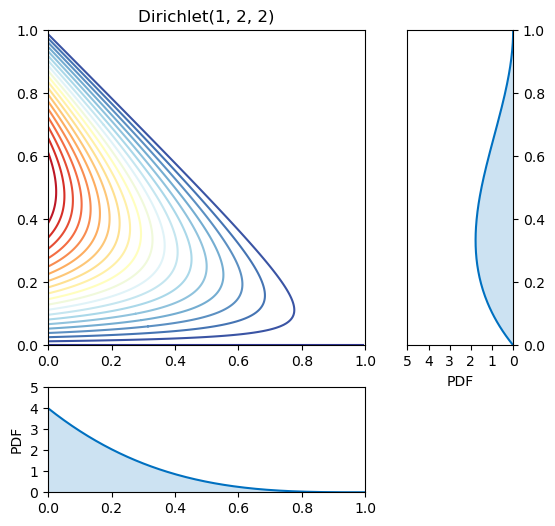

In [28]:
# Dirichlet alphas
alpha_1 = 1
alpha_2 = 2
alpha_3 = 2

alpha_0 = alpha_1 + alpha_2 + alpha_3

alphas = np.array([alpha_1, alpha_2, alpha_3])
rv = stats.dirichlet(alphas)
# 1-2
PDF_ff = rv.pdf(np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])))

PDF_ff = np.reshape(PDF_ff, xx1.shape)

beta_dist = stats.beta

theta_array = np.linspace(0, 1, 500)

beta_1 = alpha_0 - alpha_1
f_x1 = beta_dist.pdf(
    x1,
    alpha_1,
    beta_1)

beta_2 = alpha_0 - alpha_2
f_x2 = beta_dist.pdf(
    x2,
    alpha_2,
    beta_2)

title_txt = 'Dirichlet(%0.0f, %0.0f, %0.0f)' % (alpha_1, alpha_2, alpha_3)
plot_joint_marginal(xx1, xx2, PDF_ff,
                    x1, f_x1,
                    x2, f_x2,
                    title_txt)

### 利用subgridspec函数创建嵌套子图

In [29]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2 * np.pi, 0.05)):
    return np.sin(i * a) * np.cos(i * b), np.sin(i * c) * np.cos(i * d)

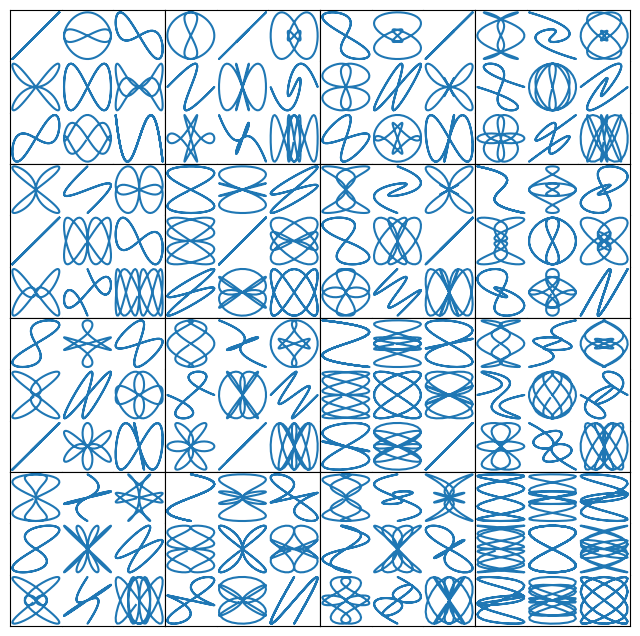

In [30]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())